In [1]:
from eib import *

  0%|          | 0/7 [00:00<?, ?it/s]

TRACK-JRA3Q


 14%|█▍        | 1/7 [00:47<04:42, 47.13s/it]

TRACK-ERA5


 29%|██▊       | 2/7 [01:36<04:02, 48.48s/it]

TRACK-ECMWF-OP-AN


 43%|████▎     | 3/7 [01:46<02:03, 30.78s/it]

TRACK-CERA20C
TRACK-MERRA2


 71%|███████▏  | 5/7 [02:11<00:41, 20.56s/it]

TRACK-NCEP


 86%|████████▌ | 6/7 [02:33<00:20, 20.82s/it]

SyCLoPS-ERA5


100%|██████████| 7/7 [02:50<00:00, 24.41s/it]


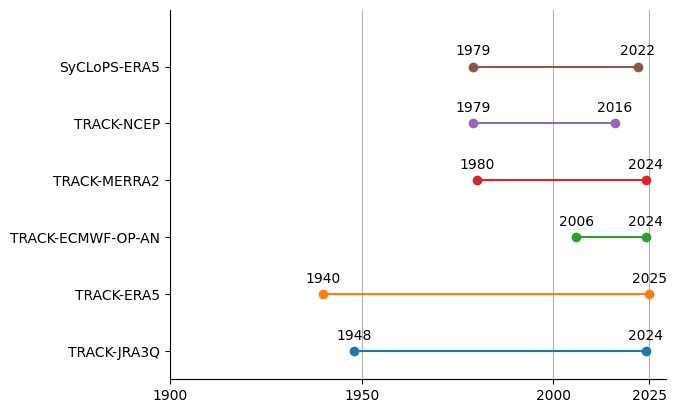

In [3]:
# All contemporary reanalyses tracks
tracks={}
TRACK_flist = glob("TRACK/TRACK-*.csv")
SyCLoPS_flist = glob("SyCLoPS/SyCLoPS-*.csv")
for f in tqdm(TRACK_flist + SyCLoPS_flist):
    name = f.split("/")[-1].split('.')[0]
    print(name)
    if name != "TRACK-CERA20C":
        tracks[name] = huracanpy.load(f)
        # Reduce size 
        varlist = list(tracks[name].variables.keys())
        ## Remove unused variables
        extravars = list(set(varlist) & set(["full_name", "transition_zone", "track_info",]))
        tracks[name] = tracks[name].drop_vars(extravars)
        ## Reduce str length
        strvars = list(set(varlist) & set(["track_id", "short_label"]))
        for var in strvars:
            max_str_length = str(tracks[name][var].astype(str).str.len().max().values)
            tracks[name][var] = tracks[name][var].astype("<S"+max_str_length)
        ## Convert numerical variables to single floats
        numvars = list(set(varlist) & set(["lon", "lat", "pres", "wind10", "psl_lon", "psl_lat", "ike"]))
        for var in numvars:
            tracks[name][var] = tracks[name][var].astype(np.float32)
        ## Convert int variables to int32
        numvars = list(set(varlist) & set(["lpsarea"]))
        for var in numvars:
            tracks[name][var] = tracks[name][var].astype(np.int32)
        ## Convert flags to booleans
        boolvars = list(set(varlist) & set(["tropical_flag"]))
        for var in boolvars:
            tracks[name][var] = tracks[name][var].astype(bool)
        with open("input/"+name+".pkl", "wb") as file:
            pkl.dump(tracks[name], file)

for i, s in enumerate(tracks):
    Ymin, Ymax = tracks[s].time.dt.year.min().values, tracks[s].time.dt.year.max().values
    plt.plot([Ymin, Ymax], [i, i], marker = 'o')
    plt.text(Ymin, i+0.2, Ymin, horizontalalignment='center',)
    plt.text(Ymax, i+0.2, Ymax, horizontalalignment='center',)
plt.yticks(np.arange(len(tracks)), tracks)
plt.xticks([1900, 1950, 2000, 2025])
plt.ylim(-0.5, len(tracks))
sns.despine()
plt.grid(axis = 'x')

In [ ]:
# Tracks with CPS
tracks={}
TRACK_flist = glob("TRACK_CPS/TRACK_CPS-*.csv")

for f in tqdm(TRACK_flist):
    name = "TRACK-" + f.split("-")[-1].split('.')[0]
    tracks[name] = huracanpy.load(f)
    # Reduce size 
    varlist = list(tracks[name].variables.keys())
    ## Remove unused variables
    extravars = list(set(varlist) & set(['longitude_psl','latitude_psl','pres','wind925_lon','wind925_lat',
                                         'wind925','wind10_lon','wind10_lat','wind10','track_id',]))
    tracks[name] = tracks[name].drop_vars(extravars)
    ## Convert numerical variables to single floats
    numvars = list(set(varlist) & set(["lon", "lat", "vtl", "vtu", "b"]))
    for var in numvars:
        tracks[name][var] = tracks[name][var].astype(np.float32)
with open("input/tracks_with_CPS_data.pkl", "wb") as file:
    pkl.dump(tracks, file)

for i, s in enumerate(tracks):
    Ymin, Ymax = tracks[s].time.dt.year.min().values, tracks[s].time.dt.year.max().values
    plt.plot([Ymin, Ymax], [i, i], marker = 'o')
    plt.text(Ymin, i+0.2, Ymin, horizontalalignment='center',)
    plt.text(Ymax, i+0.2, Ymax, horizontalalignment='center',)
plt.yticks(np.arange(len(tracks)), tracks)
plt.xticks([1900, 1950, 2000, 2025])
plt.ylim(-0.5, len(tracks))
sns.despine()
plt.grid(axis = 'x')

In [ ]:
sources = ["ERA5", "JRA3Q"]
# Path dict
filepaths = {s: glob("TRACK_subsets/"+s+"/"+s+"*_WCSI.nc")[0] for s in sources}
# Data dict
tracks = {}
for s in tqdm(sources):
    name = "TRACK-" + s
    tracks[name] = huracanpy.load(filepaths[s], baselon = -180)[["lon", "lat", "time", "is_tc"]]
with open("input/tracks_WCSI.pkl", "wb") as file:
    pkl.dump(tracks, file)
for i, s in enumerate(tracks):
    Ymin, Ymax = tracks[s].time.dt.year.min().values, tracks[s].time.dt.year.max().values
    plt.plot([Ymin, Ymax], [i, i], marker = 'o')
    plt.text(Ymin, i+0.2, Ymin, horizontalalignment='center',)
    plt.text(Ymax, i+0.2, Ymax, horizontalalignment='center',)
plt.yticks(np.arange(len(tracks)), tracks)
plt.xticks([1900, 1950, 2000, 2025])
plt.ylim(-0.5, len(tracks))
sns.despine()
plt.grid(axis = 'x')